<a href="https://colab.research.google.com/github/Sobiii/Search-Engine-Design-G4/blob/Sobii/Sobs_Attempt4_BM25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting Documents

## CISI ALL extraction

In [1]:
import os as os

# get the current working directory
notebook_dir = os.getcwd()

# define paths to CISI dataset files
cisi_all_path = os.path.join(notebook_dir, 'CISI.ALL')
cisi_qry_path = os.path.join(notebook_dir, 'CISI.QRY')
cisi_rel_path = os.path.join(notebook_dir, 'CISI.REL')

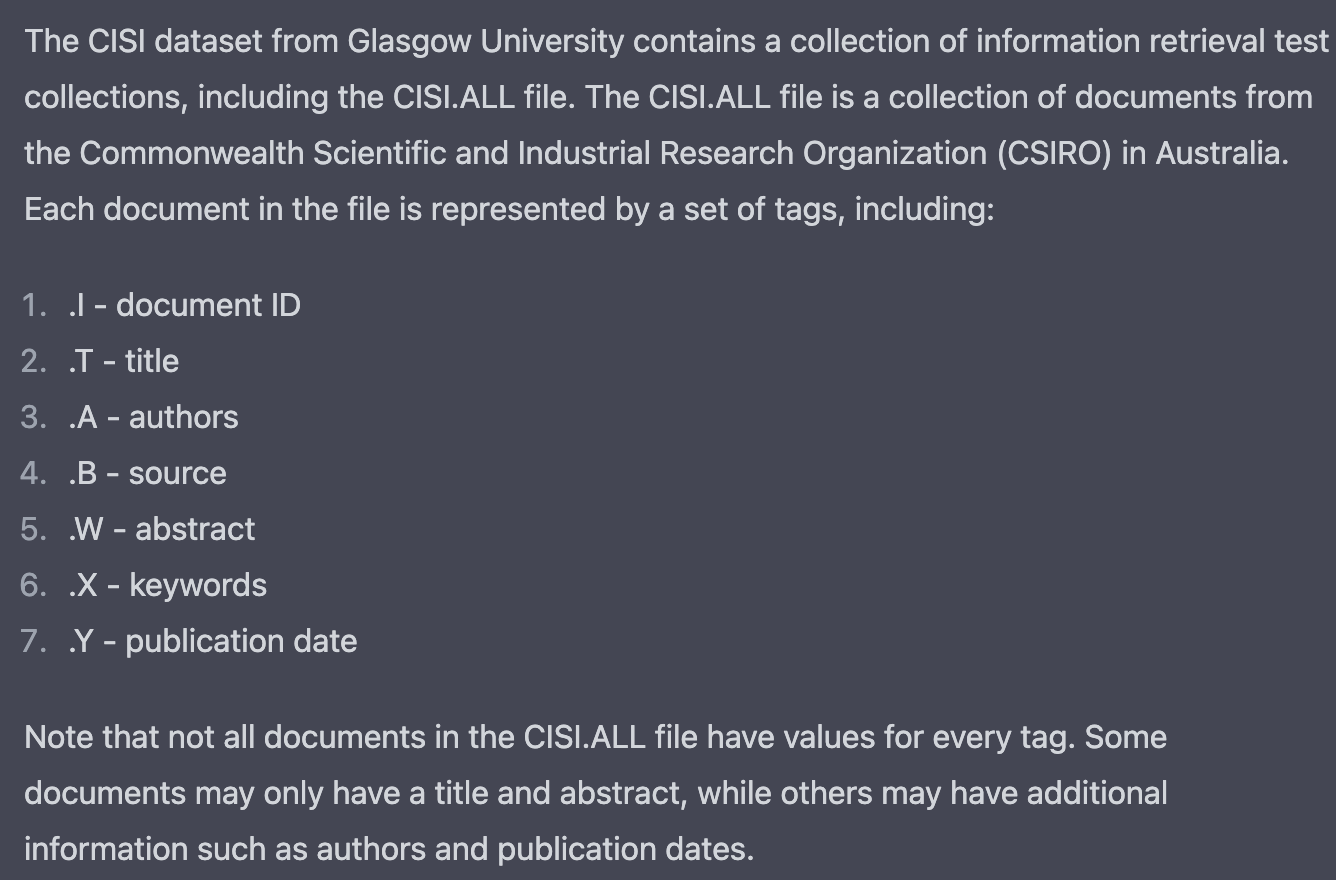

In [2]:
import re

def extraction(file_name_path):
    with open(file_name_path) as f:
        file_lines = f.readlines()

    doc_ids = []
    documents = []
    i = 0
    while i < len(file_lines):
        if file_lines[i].startswith(".I"):
            doc_id = file_lines[i].split()[1]
            doc_ids.append(doc_id)
            if file_lines[i+1].startswith(".T") and file_lines[i+3].startswith(".A"):
                title = file_lines[i+2][:].strip()
            else:
                title = file_lines[i+2].strip() + " " + file_lines[i+3].strip()
            authors = ""
            if any([line.startswith(".A") for line in file_lines[i+1:]]):
                author_start = i+4
                author_end = author_start
                while author_end < len(file_lines) and not any([file_lines[author_end].startswith(tag) for tag in [".T", ".B", ".W", ".Y"]]):
                    author_end += 1
                authors = " ".join([file_lines[j].strip() for j in range(author_start, author_end)]).strip()
                authors = re.sub(r"^\s*\.\s*A\s*", "", authors)
                abstract_start = author_end
            else:
                abstract_start = i+4

            for t in range(i+4, len(file_lines)):
                if file_lines[t].startswith(".X"):
                    abstract_end = t
                    break
            else:
                abstract_end = len(file_lines)
            abstract = " ".join(file_lines[abstract_start:abstract_end]).strip().replace('\n', ' ')
            abstract = re.sub(r"^\s*\.\s*W\s*", "", abstract)
            abstract = " ".join(abstract.split())
            source = re.search(r"\.B\s+(.*)\.W", abstract)
            if source:
                source = source.group(1)
                source = re.sub(r"^\s*\.\s*A\s*", "", source)
                source = re.sub(r"^\s*\.\s*B\s*", "", source)
            else:
                source = ""
            abstract = re.sub(r"^\s*\.\s*B\s*(.*)\.W", "", abstract)
            abstract = " ".join(abstract.split())
            year = re.search(r"\.Y\s+(\d{4})", abstract)
            if year:
                year = int(year.group(1))
            else:
                year = ""
            abstract = re.sub(r"^\s*\.\s*Y\s*\d{4}\s*", "", abstract)
            abstract = " ".join(abstract.split())
            documents.append({"document_id": doc_id, "title": title, "authors": authors, "abstract": abstract, "source": source, "year": year})
            i = abstract_end
        else:
            i += 1

    return documents


In [3]:
documents = extraction(cisi_all_path)
documents

[{'document_id': '1',
  'title': '18 Editions of the Dewey Decimal Classifications',
  'authors': 'Comaromi, J.P.',
  'abstract': "The present study is a history of the DEWEY Decimal Classification. The first edition of the DDC was published in 1876, the eighteenth edition in 1971, and future editions will continue to appear as needed. In spite of the DDC's long and healthy life, however, its full story has never been told. There have been biographies of Dewey that briefly describe his system, but this is the first attempt to provide a detailed history of the work that more than any other has spurred the growth of librarianship in this country and abroad.",
  'source': '',
  'year': ''},
 {'document_id': '2',
  'title': 'Use Made of Technical Libraries',
  'authors': 'Slater, M.',
  'abstract': 'This report is an analysis of 6300 acts of use in 104 technical libraries in the United Kingdom. Library use is only one aspect of the wider pattern of information use. Information transfer in 

## CISI QRY extraction

The following code is correct and works for the first 57 queries (1-57) how wever the remaining queiries have a different format and thus different code to extract those.

## Extraction of 1st 57 Queries from CISI.QRY

In [4]:
# query extraction from CISI.QRY file (1st 57 queries only)
def extraction_query(file_name_path):
    with open(file_name_path) as f:
        file_lines = f.readlines()

    queries_1 = []
    i = 0
    while i < len(file_lines):
        if file_lines[i].startswith(".I"):
            query_id = int(file_lines[i][3:])
            if query_id > 57:
                break
            if file_lines[i+1].startswith(".W"):
                query_text = file_lines[i+2].strip()
                for t in range(i+3, len(file_lines)):
                    if file_lines[t].startswith(".I"):
                        break
                    query_text += " " + file_lines[t].strip()
            else:
                query_text = ""
            queries_1.append({"query_id": query_id, "query_text": query_text})
        i += 1

    return queries_1

In [5]:
queries_1 = extraction_query(cisi_qry_path)
queries_1

[{'query_id': 1,
  'query_text': 'What problems and concerns are there in making up descriptive titles? What difficulties are involved in automatically retrieving articles from approximate titles? What is the usual relevance of the content of articles to their titles?'},
 {'query_id': 2,
  'query_text': 'How can actually pertinent data, as opposed to references or entire articles themselves, be retrieved automatically in response to information requests?'},
 {'query_id': 3,
  'query_text': 'What is information science?  Give definitions where possible.'},
 {'query_id': 4,
  'query_text': 'Image recognition and any other methods of automatically transforming printed text into computer-ready form.'},
 {'query_id': 5,
  'query_text': 'What special training will ordinary researchers and businessmen need for proper information management and unobstructed use of information retrieval systems? What problems are they likely to encounter?'},
 {'query_id': 6,
  'query_text': 'What possibilities 

## Extraction of remaining Queries from CISI.QRY

In [6]:
# query extraction from CISI.QRY file (58th query onwards)
def extraction_remaining_queries(file_name_path):
    with open(file_name_path) as f:
        file_lines = f.readlines()

    queries = []
    i = 0
    while i < len(file_lines):
        if file_lines[i].startswith(".I"):
            query_id = int(file_lines[i][3:])
            if query_id > 57:
                query_title = ""
                query_author = ""
                query_text = ""
                query_source = ""
                found_text_field = False
                found_source_field = False
                for t in range(i+1, len(file_lines)):
                    if file_lines[t].startswith(".I"):
                        break
                    elif file_lines[t].startswith(".T"):
                        query_title += file_lines[t][3:].strip()
                        # Check if the next line starts with .A and the line after that starts with .T
                        next_t = t+1
                        if next_t < len(file_lines) and file_lines[next_t].startswith(".A") and (next_t+1) < len(file_lines) and file_lines[next_t+1].startswith(".T"):
                            query_title += " " + file_lines[next_t].strip()
                            next_t += 1
                        # Check if the next line also contains title text
                        while next_t < len(file_lines) and not file_lines[next_t].startswith(".I") and not file_lines[next_t].startswith(".A") and not file_lines[next_t].startswith(".W") and not file_lines[next_t].startswith(".B"):
                            query_title += " " + file_lines[next_t].strip()
                            next_t += 1
                    elif file_lines[t].startswith(".A"):
                        query_author += file_lines[t+1][3:].strip()
                        # Check if the next line also contains author text
                        next_t = t+1
                        while next_t < len(file_lines) and not file_lines[next_t].startswith(".I") and not file_lines[next_t].startswith(".T") and not file_lines[next_t].startswith(".W") and not file_lines[next_t].startswith(".B") and not file_lines[next_t].startswith(".A"):
                            query_author += ", " + file_lines[next_t].strip()
                            next_t += 1
                            query_author += ", " + file_lines[next_t].strip()
                            next_t += 1
                    elif file_lines[t].startswith(".W"):
                        found_text_field = True
                        query_text = re.sub(r'^\.W\s*', '', file_lines[t].strip())  # Use regex to remove ".W" tag from the beginning of the line
                        for u in range(t+2, len(file_lines)):
                            if file_lines[u].startswith(".I") or file_lines[u].startswith(".B"):
                                break
                            query_text += " " + file_lines[u].strip()
                    elif file_lines[t].startswith(".B"):
                        found_source_field = True
                        query_source = file_lines[t][3:].strip()
                        for u in range(t+1, len(file_lines)):
                            if file_lines[u].startswith(".I"):
                                break
                            query_source += " " + file_lines[u].strip()
                    elif not found_text_field and not found_source_field:
                        # Assume any field that appears before the .W and .B field is either the title or author
                        if not query_title:
                            query_title = file_lines[t].strip()
                        elif query_author:
                            query_author = file_lines[t-1].strip()
                            query_author += file_lines[t].strip()
                queries.append({"query_id": query_id, "query_title": query_title, "query_author": query_author, "query_text": query_text, "query_source": query_source})
        i += 1

    return queries

In [7]:
queries_2 = extraction_remaining_queries(cisi_qry_path)
queries_2

[{'query_id': 58,
  'query_title': ' Directions in Library Networking',
  'query_author': 'Avram, H.D.McCallum, S.H.',
  'query_text': ' of keying into online systems brought an interdependence among libraries, the service centers that mediate between them, and the large utilities that process and distribute data.  From this has developed the basic network structure among libraries in the United States.  The independent development of major networks has brought problems in standardization and coordination. The authors point out that while technology has led toward centralization of automated library services, new developments are now pushing toward decentralization.  Coordination is a requirement to avoid fragmentation in this new environment.',
  'query_source': ' (JASIS, Vol. 31, No. 6, November 1980, pp. 438-444) '},
 {'query_id': 59,
  'query_title': ' Performance Testing of a Book and Its Index as a Information Retrieval System',
  'query_author': '.ABennion, B.C.',
  'query_text'

# Pre-processing CISI Data 


The following NLP preprocessing steps will be administered to both the document and query data:

1.   Tokenizing
2.   Converting text to lowercase
3.   Removing stopwords
4.   Removing special characters, numbers, and punctuation marks

### Preprocessing the Document data and producing the Corpus

In [8]:
# Importing NLP preprocessing libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Creating corpus
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

documents = extraction(cisi_all_path)
corpus = []

for document in documents:
    text = ""
    if "title" in document and document["title"]:
        text += document["title"]
    if "authors" in document and document["authors"]:
        text += " " + document["authors"]
    if "abstract" in document and document["abstract"]:
        text += " " + document["abstract"]
    if text:  # only add non-empty strings to corpus
        # Remove special characters, numbers, and punctuation marks
        text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
        # Remove quotation marks
        text = text.replace("'", "").replace('"', '')
        # Tokenize and convert to lowercase
        tokens = word_tokenize(text.lower())
        # Remove stop words
        filtered_text = [word for word in tokens if word not in stop_words]
        # Lemmatize words
        lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
        # Join tokens back to form a string
        preprocessed_text = ' '.join(lemmatized_text)
        corpus.append(preprocessed_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Printing the 3rd document from corpus to check against CISI.ALL file
print(corpus[2])

two kind power essay bibliographic control wilson p relationship organization control writing organization control knowledge information inevitably enter story writing contain along much else great deal mankind stock knowledge information bibliographical control form power knowledge form power familiar slogan claim bibliographical control certain sense power power power obtain knowledge recorded written form writing simply simple way storehouse knowledge satisfactorily discus bibliographical control simply control knowledge information contained writing


### Prepreocessing the 1st 57 Queries

In [10]:
# Preprocessing queries_1
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

preprocessed_queries_1 = []

for query in queries_1:
    query_text = query['query_text']  # Extract query_text from the dictionary
    # Tokenize and convert to lowercase
    tokens = word_tokenize(query_text.lower())
    # Remove special characters, numbers, and punctuation marks
    filtered_query = [word for word in tokens if word not in string.punctuation + string.digits]
    # Remove quotation marks
    filtered_query = [word.replace("'", "").replace('"', '') for word in filtered_query]
    # Remove stop words
    filtered_query = [word for word in filtered_query if word not in stop_words]
    # Lemmatize words
    lemmatized_query = [lemmatizer.lemmatize(word) for word in filtered_query]
    # Join tokens back to form a string
    preprocessed_query = ' '.join(lemmatized_query)
    preprocessed_queries_1.append(preprocessed_query)
    qry_terms_1 = preprocessed_queries_1

In [11]:
# Printing example queries
qry_terms_1[5]

'possibility verbal communication computer human communication via spoken word'

### Preprocessing the remaining Queries

In [12]:
# Preprocessing queries_2
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

preprocessed_queries_2 = []

for query in queries_2:
    query_text = query['query_text']  # Extract query_text from the dictionary
    # Tokenize and convert to lowercase
    tokens = word_tokenize(query_text.lower())
    # Remove special characters, numbers, and punctuation marks
    filtered_query = [word for word in tokens if word not in string.punctuation + string.digits]
    # Remove quotation marks
    filtered_query = [word.replace("'", "").replace('"', '') for word in filtered_query]
    # Remove stop words
    filtered_query = [word for word in filtered_query if word not in stop_words]
    # Lemmatize words
    lemmatized_query = [lemmatizer.lemmatize(word) for word in filtered_query]
    # Join tokens back to form a string
    preprocessed_query = ' '.join(lemmatized_query)
    preprocessed_queries_2.append(preprocessed_query)
    qry_terms_2 = preprocessed_queries_2

In [13]:
# Printing example queries to double check
qry_terms_2[2]

'coupling document cocitations cited citing paper produced improved document retrieval measure based bibliographic coupling test collection consisted 1712 paper whose relevance specific query judged user evaluate effect using cocitation data calculated query two measure similarity relevant paper every paper retrieved paper sorted similarity measure producing two ordered list compared resulting prediction relevance partial relevance non-relevance user evaluation paper overall change bibliographic coupling measure linkage similarity measure representing introduction cocitation data resulted better retrieval performance'

# Indexing 

manual - only did what was necessary for BM25


## Indexing CISI documents

In [14]:
# Indexing using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
documents_vectorized = vectorizer.fit_transform(corpus)
print ('We have a {} document corpus with a {} term vocabulary'.format(*documents_vectorized.shape))

We have a 1460 document corpus with a 10290 term vocabulary


In [15]:
# Creating a document term-frequency matrix
import pandas as pd

vocabulary = vectorizer.get_feature_names_out()
df = pd.DataFrame(documents_vectorized.toarray(), columns=vocabulary)
doc_ids = df.index.values
df.head() # Note empty just sparse

aa  aacr  aacrthere  ab  abandon  abandonment  abbot  abbreviated  \
0   0     0          0   0        0            0      0            0   
1   0     0          0   0        0            0      0            0   
2   0     0          0   0        0            0      0            0   
3   0     0          0   0        0            0      0            0   
4   0     0          0   0        0            0      0            0   

   abbreviating  abbreviation  ...  zipfian  zipfs  zipperer  zone  zoology  \
0             0             0  ...        0      0         0     0        0   
1             0             0  ...        0      0         0     0        0   
2             0             0  ...        0      0         0     0        0   
3             0             0  ...        0      0         0     0        0   
4             0             0  ...        0      0         0     0        0   

   zuckerman  zuckermans  zunde  zvezhinskii  zyabrev  
0          0           0      0            0        0  
1          0           0      0            0        0  
2          0           0      0            0        0  
3          0           0      0            0        0  
4          0           0      0            0        0  

[5 rows x 10290 columns]

## Indexing Query terms 1

In [16]:

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Use the vectorizer to transform the list of query terms into a term-document matrix
qry_terms_1_matrix = vectorizer.fit_transform(qry_terms_1)

# Convert the sparse matrix to a dense matrix
qry_terms_1_dense = qry_terms_1_matrix.toarray()

# Create a DataFrame from the dense matrix
qry_terms_1_df = pd.DataFrame(qry_terms_1_dense, columns=vectorizer.get_feature_names_out())
qry_terms_1_df.head() # sparse dataframe

abstract  accepted  access  achieving  acquisition  actual  actually  \
0         0         0       0          0            0       0         0   
1         0         0       0          0            0       0         1   
2         0         0       0          0            0       0         0   
3         0         0       0          0            0       0         0   
4         0         0       0          0            0       0         0   

   adequately  advantage  affect  ...  well  without  word  worker  working  \
0           0          0       0  ...     0        0     0       0        0   
1           0          0       0  ...     0        0     0       0        0   
2           0          0       0  ...     0        0     0       0        0   
3           0          0       0  ...     0        0     0       0        0   
4           0          0       0  ...     0        0     0       0        0   

   worth  would  write  written  year  
0      0      0      0        0     0  
1      0      0      0        0     0  
2      0      0      0        0     0  
3      0      0      0        0     0  
4      0      0      0        0     0  

[5 rows x 451 columns]

In [17]:
non_zero_values = qry_terms_1_df[qry_terms_1_df != 0].stack().dropna().reset_index()
non_zero_values.columns = ['Row', 'Column', 'Value']
print(non_zero_values)

     Row         Column  Value
0      0    approximate    1.0
1      0        article    2.0
2      0  automatically    1.0
3      0        concern    1.0
4      0        content    1.0
..   ...            ...    ...
846   56        subject    2.0
847   56         system    1.0
848   56          title    1.0
849   56     ultimately    1.0
850   56           used    1.0

[851 rows x 3 columns]


## Indexing Query terms 2

In [18]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Use the vectorizer to transform the list of query terms into a term-document matrix
qry_terms_2_matrix = vectorizer.fit_transform(qry_terms_2)

# Convert the sparse matrix to a dense matrix
qry_terms_2_dense = qry_terms_2_matrix.toarray()

# Create a DataFrame from the dense matrix
qry_terms_2_df = pd.DataFrame(qry_terms_2_dense, columns=vectorizer.get_feature_names_out())
qry_terms_2_df.head() # sparse dataframe

000  10  100  11  121  13  148  1712  177  1960s  ...  word  words  work  \
0    0   0    0   0    0   0    0     0    0      0  ...     0      0     0   
1    0   0    0   0    0   0    0     0    0      0  ...     0      0     0   
2    0   0    0   0    0   0    0     1    0      0  ...     0      0     0   
3    0   0    0   0    0   0    0     0    0      0  ...     0      0     0   
4    0   0    0   0    0   0    0     0    0      0  ...     0      0     0   

   would  writer  written  year  yet  yield  zero  
0      0       0        0     0    0      0     0  
1      0       0        0     0    1      2     0  
2      0       0        0     0    0      0     0  
3      0       0        0     0    0      0     0  
4      0       0        0     0    0      0     0  

[5 rows x 1331 columns]

In [19]:
non_zero_values = qry_terms_1_df[qry_terms_1_df != 0].stack().dropna().reset_index()
non_zero_values.columns = ['Row', 'Column', 'Value']
print(non_zero_values)

     Row         Column  Value
0      0    approximate    1.0
1      0        article    2.0
2      0  automatically    1.0
3      0        concern    1.0
4      0        content    1.0
..   ...            ...    ...
846   56        subject    2.0
847   56         system    1.0
848   56          title    1.0
849   56     ultimately    1.0
850   56           used    1.0

[851 rows x 3 columns]


## Importing Elasticsearch

In [20]:
# Need to figure this out

# BM25 Implementation

The following fucntion calculates BM25 scores and outputs a pandas dataframe containing the scores with matching index and column names. It takes values for paramaters such as df and k1, k2, k3, b and term_weights that can be used to finetune the BM25 model.

In [21]:
# BM25 Implementation
import numpy as np


def calculate_bm25_score(df, k1, k2, k3, b, term_weights):
    
    # Calculate DF
    dfs = (df > 0).sum(axis=0)
    
    # Calculate IDFs
    N = len(df)
    idfs = np.log10(N/dfs)
    
    # Calculate average document length
    dls = df.sum(axis=1).tolist()
    avgdl = np.mean(dls)
    
    # Calculate BM25 score
    numerator = np.array((k1 + 1) * df)
    denominator = np.array(k1 * ((1 - b) + b * (dls / avgdl))).reshape(N, 1) + np.array(df)
    BM25_tf = numerator / denominator
    idfs = np.array(idfs)
    BM25_score = (idfs * BM25_tf * term_weights) + ((k2 + 1) * term_weights * df) / ((k2 * (1 - b + b * (dls / avgdl))).reshape(N, 1) + df) + (k3 * term_weights)
    
    # Convert BM25 score to a pandas DataFrame with matching index and column names
    BM25_score = pd.DataFrame(BM25_score, columns=df.columns, index=df.index)
    
    return BM25_score


### Creating a dataframe of BM25 scores

In [27]:
# Instance of BM25 for CISI documents
bm25_scores = calculate_bm25_score(df, k1=1.2, k2=1.5, k3=1, b=0.8, term_weights=1)
bm25_scores.head() #  not empty just sparse

aa  aacr  aacrthere   ab  abandon  abandonment  abbot  abbreviated  \
0  1.0   1.0        1.0  1.0      1.0          1.0    1.0          1.0   
1  1.0   1.0        1.0  1.0      1.0          1.0    1.0          1.0   
2  1.0   1.0        1.0  1.0      1.0          1.0    1.0          1.0   
3  1.0   1.0        1.0  1.0      1.0          1.0    1.0          1.0   
4  1.0   1.0        1.0  1.0      1.0          1.0    1.0          1.0   

   abbreviating  abbreviation  ...  zipfian  zipfs  zipperer  zone  zoology  \
0           1.0           1.0  ...      1.0    1.0       1.0   1.0      1.0   
1           1.0           1.0  ...      1.0    1.0       1.0   1.0      1.0   
2           1.0           1.0  ...      1.0    1.0       1.0   1.0      1.0   
3           1.0           1.0  ...      1.0    1.0       1.0   1.0      1.0   
4           1.0           1.0  ...      1.0    1.0       1.0   1.0      1.0   

   zuckerman  zuckermans  zunde  zvezhinskii  zyabrev  
0        1.0         1.0    1.0          1.0      1.0  
1        1.0         1.0    1.0          1.0      1.0  
2        1.0         1.0    1.0          1.0      1.0  
3        1.0         1.0    1.0          1.0      1.0  
4        1.0         1.0    1.0          1.0      1.0  

[5 rows x 10290 columns]

In [28]:
# code used to check that the bm25_scores df is correct
non_zero_values = df[df != 0].stack().dropna().reset_index()
non_zero_values.columns = ['Row', 'Column', 'Value']
print(non_zero_values)

        Row      Column  Value
0         0      abroad    1.0
1         0      appear    1.0
2         0     attempt    1.0
3         0   biography    1.0
4         0     briefly    1.0
...     ...         ...    ...
74372  1459  technology    2.0
74373  1459    thousand    1.0
74374  1459        time    1.0
74375  1459       world    2.0
74376  1459        year    3.0

[74377 rows x 3 columns]


###Creating a copy of the BM25_scores df that only contains qry_terms_1

In [43]:
# Creating a copy of the BM25_scores df that only contains qry_terms_1

# Creating a copy of the BM25_scores df based on the values in qry_terms_1_df
qry_1_BM25 = bm25_scores
columns_to_drop = list(set(bm25_scores.columns) - set(qry_terms_1_df.columns))

# Drop columns from qry_1_BM25
qry_1_BM25 = qry_1_BM25.drop(columns=columns_to_drop)
qry_1_BM25.head()

abstract  accepted  access  achieving  acquisition  actual  actually  \
0       1.0       1.0     1.0        1.0          1.0     1.0       1.0   
1       1.0       1.0     1.0        1.0          1.0     1.0       1.0   
2       1.0       1.0     1.0        1.0          1.0     1.0       1.0   
3       1.0       1.0     1.0        1.0          1.0     1.0       1.0   
4       1.0       1.0     1.0        1.0          1.0     1.0       1.0   

   adequately  advantage  affect  ...  volume  wanted       way  word  worker  \
0         1.0        1.0     1.0  ...     1.0     1.0  1.000000   1.0     1.0   
1         1.0        1.0     1.0  ...     1.0     1.0  2.902049   1.0     1.0   
2         1.0        1.0     1.0  ...     1.0     1.0  3.076314   1.0     1.0   
3         1.0        1.0     1.0  ...     1.0     1.0  3.216986   1.0     1.0   
4         1.0        1.0     1.0  ...     1.0     1.0  1.000000   1.0     1.0   

   working  worth  write   written      year  
0      1.0    1.0    1.0  1.000000  1.000000  
1      1.0    1.0    1.0  1.000000  1.000000  
2      1.0    1.0    1.0  3.546129  1.000000  
3      1.0    1.0    1.0  1.000000  1.000000  
4      1.0    1.0    1.0  1.000000  2.681636  

[5 rows x 397 columns]

###Creating a copy of the BM25_scores df that only contains qry_terms_2

In [44]:
# Creating a copy of the BM25_scores df that only contains qry_terms_2

# Creating a copy of the BM25_scores df based on the values in qry_terms_2_df
qry_2_BM25 = bm25_scores
columns_to_drop = list(set(bm25_scores.columns) - set(qry_terms_2_df.columns))

# Drop columns from qry_2_BM25
qry_2_BM25 = qry_2_BM25.drop(columns=columns_to_drop)
qry_2_BM25.head()

ability  able  absolute  abstract  access  according  accurate  accurately  \
0      1.0   1.0       1.0       1.0     1.0        1.0       1.0         1.0   
1      1.0   1.0       1.0       1.0     1.0        1.0       1.0         1.0   
2      1.0   1.0       1.0       1.0     1.0        1.0       1.0         1.0   
3      1.0   1.0       1.0       1.0     1.0        1.0       1.0         1.0   
4      1.0   1.0       1.0       1.0     1.0        1.0       1.0         1.0   

   acquisition  activity  ...  western     wide  wln  word      work  writer  \
0          1.0       1.0  ...      1.0  1.00000  1.0   1.0  3.212493     1.0   
1          1.0       1.0  ...      1.0  1.00000  1.0   1.0  1.000000     1.0   
2          1.0       1.0  ...      1.0  1.00000  1.0   1.0  1.000000     1.0   
3          1.0       1.0  ...      1.0  1.00000  1.0   1.0  1.000000     1.0   
4          1.0       1.0  ...      1.0  3.49017  1.0   1.0  1.000000     1.0   

    written      year  yield  zero  
0  1.000000  1.000000    1.0   1.0  
1  1.000000  1.000000    1.0   1.0  
2  3.546129  1.000000    1.0   1.0  
3  1.000000  1.000000    1.0   1.0  
4  1.000000  2.681636    1.0   1.0  

[5 rows x 1095 columns]

### Calculating the total BM25 scores per document based on queries

In [48]:
# Calculating the total BM25 scores per document based on qry_terms_1 terms only
score_q1 = qry_1_BM25.sum(axis=1)
score_q1 

0       426.879295
1       441.299562
2       421.198331
3       445.312931
4       443.787212
           ...    
1455    419.108590
1456    437.559970
1457    417.305683
1458    425.875797
1459    450.446114
Length: 1460, dtype: float64

In [49]:
# Calculating the total BM25 scores per document based on qry_terms_2 terms only
score_q2 = qry_2_BM25.sum(axis=1)
score_q2 

0       1128.294395
1       1147.151612
2       1159.216426
3       1153.424597
4       1183.990436
           ...     
1455    1155.167237
1456    1157.011015
1457    1138.830438
1458    1148.695293
1459    1149.969656
Length: 1460, dtype: float64

## Ranking documents based on BM25 for the 1st 57 queries

In [51]:
# rank the documents based on 1st 57 documents
BM_ranked_docs_q1 = sorted(zip(enumerate(documents), score_q1 .values),
                     key = lambda tup:tup[1],
                     reverse=True)
for doc in BM_ranked_docs_q1:
  print(f'Score: {round(doc[1], 1)}, Document {doc[0][0]}: "{doc[0][1]}"')

Score: 493.0, Document 16: "{'document_id': '17', 'title': 'Adventures in Librarianship', 'authors': 'Voigt, M.J.', 'abstract': 'There has long been a need for a continuing series to provide scholarly reviews of the rapidly changing and advancing field of librarianship, a series which would select subjects with particular current significance to the profession and provide an analysis of the advances made through research and practice. Advances in Librarianship is planned and designed to fill this need. It will present critical articles and surveys based on the published literature, research in progress, and developments in libraries of all types. Mechanization may appear to be the most obvious of the advancing fronts of librarianship, for automation has caught the enthusiastic support of all librarians who can visualize its potential. Advances in this field will certainly be found in every volume of this series. As the first group of articles in this volume demonstrate, technological c

In [52]:
# rank the documents based on remaining queries
BM_ranked_docs_q2 = sorted(zip(enumerate(documents), score_q2 .values),
                     key = lambda tup:tup[1],
                     reverse=True)
for doc in BM_ranked_docs_q2:
  print(f'Score: {round(doc[1], 1)}, Document {doc[0][0]}: "{doc[0][1]}"')

Score: 1231.5, Document 1417: "{'document_id': '1418', 'title': 'Journal Usage Patterns and their Implications in the Planning of Library Systems', 'authors': "O'Neill, Edward True", 'abstract': 'Access to the literature is an essential requirement for advanced research.. Libraries, particularly academic libraries, have traditionally borne the major responsibility for providing public access to the world\'s literature.. Most universities have developed rather complex multilibrary systems of specialized libraries in order to meet the needs of various groups which they serve.. This use of special libraries to meet the needs of particular groups has, generally, resulted in a somewhat arbitrary division of the literature by disciplines.. The purpose of this study is to investigate some of the effects that this division of the literature has on its accessibility and in particular to examine the disciplines, the interdisciplinary relationships, and the scattering characteristics as they are 